## Youtube Trending Video Analysis

In this analysis, we'll try to gain a sense of what is  popular on Youtube and examine what's common among them. People who want to increase the popularity of their YouTube videos can use this information as well.

### Importing important Python Libraries for the Analysis

In [2]:
%matplotlib inline
import pandas as pd  #Pandas is used for data manuplation and analysis
import numpy as np      #Numpy is used for mathematical operation in the datasets
import matplotlib.pyplot as plt     #Matplotlib is plotting library
import seaborn as sns               #Seaborn is used for data visualization and exploratory data analysis



### Importing the data and Analysis

In [3]:
US_Video = pd.read_csv("USvideos.csv")


In [4]:
US_Video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


From the below code we can see the shape of the file that we imported (In other words, how many rows and columns are in the file)

In [5]:
US_Video.shape

(40949, 16)

Lets see if there are any null values in any of the columns. 

In [6]:
US_Video.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

The description column has 570 null values. THese are some of the rows with null description values. So to do data cleaning and to get rid of those null vaulues, we will insert empty string inplace of each
null values in the descrption columns

In [7]:
US_Video['description'] = US_Video['description'].fillna(value=" ")

In [8]:
US_Video.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

Now there are no null values in the dataset

Now lets take a look at some statistical information about the dataset.

In [9]:
US_Video.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Observation from the table:

1: The average number of views of a trending video is around 2.3 million. The Median value of number of views is around 6.8 Lac.<br>
2: The average number of Likes is around 7.4Lac, while the average dislike is 3.7k.<br>
3: The average number of comments per video is around 8.4k.

### Data Visualization

Now, we want to see how many trending videos title have atleast one uppercase word(eg: WHAT). To this we will add a new variable to the dataset whose value is "True", otherwise "FALSE"

In [10]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True

    return False

In [11]:
US_Video['Capitalize Word'] = US_Video['title'].apply(contains_capitalized_word)
US_Video['Capitalize Word'].head()


0     True
1     True
2    False
3    False
4     True
Name: Capitalize Word, dtype: bool

Now lets visualize, how many Percentage of videos have either Capitalized Words or Lower Case Words

In [12]:
value_counts = US_Video['Capitalize Word'].value_counts()
value_counts


False    22949
True     18000
Name: Capitalize Word, dtype: int64

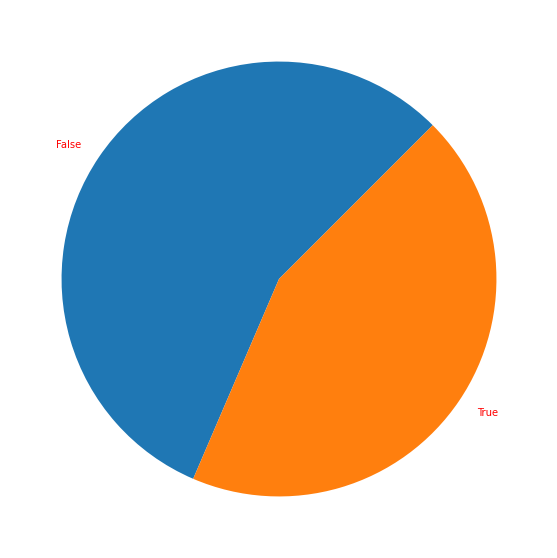

In [13]:
plt.figure(figsize=(10,10))
plt.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], textprops = {'color':'Red'},startangle=45)
plt.show()

From the chart you can see almost 44 % of the trending video title has at least one Captial Word.

Let's add another column to analyse the length of the title of trending video and then plot the title length to get an idea of the length of trending video titles:

In [14]:
US_Video['Lengthoftitle'] = US_Video['title'].apply(lambda x : len(x))
US_Video['Lengthoftitle'].head()

0    34
1    62
2    53
3    32
4    24
Name: Lengthoftitle, dtype: int64

Text(0, 0.5, 'Number of Videos')

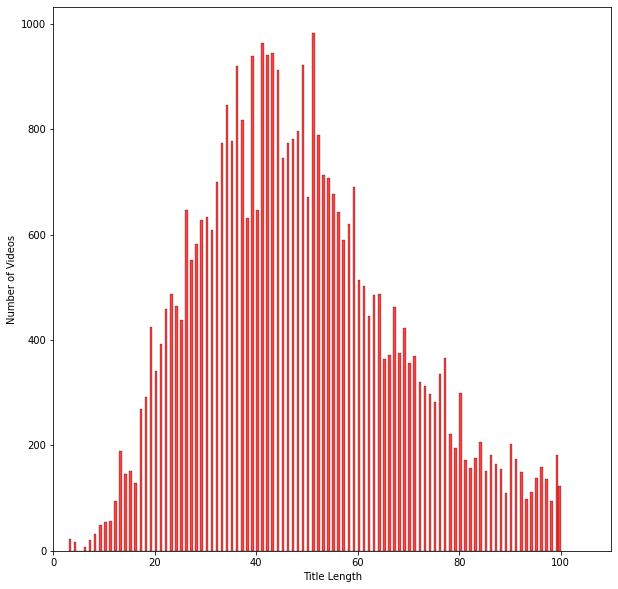

In [15]:
plt.figure(figsize=(10,10))
sns.histplot(US_Video['Lengthoftitle'], binwidth= 0.5, color='Red')
plt.xlabel("Title Length")
plt.xlim(0,110,10)
plt.ylabel("Number of Videos")

We can see from the above histogram plot the length of the distribution looks like a normal distribution, where most of the videos have a title length of around 30 - 60 characters.

Now lets plot a scatter plot to analyze the relationship between the title length and number of views

Text(0, 0.5, 'Number of Views')

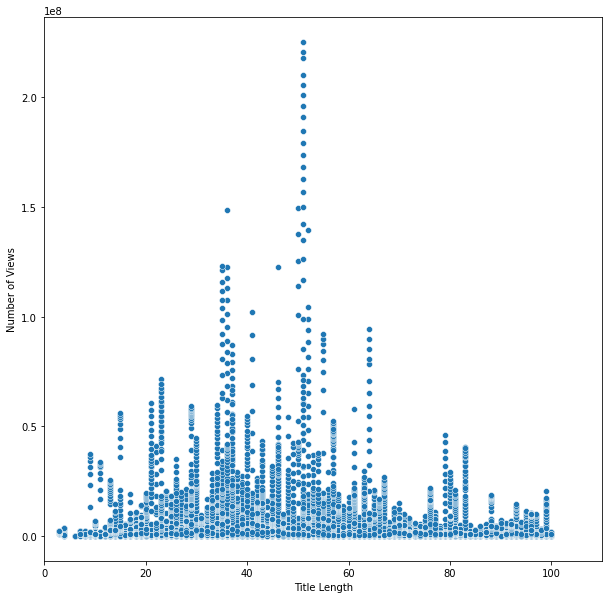

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = US_Video, x = 'Lengthoftitle', y = 'views')
plt.xlabel("Title Length")
plt.xlim(0,110,10)
plt.ylabel("Number of Views")

We can see from the scatter plot that there is no correlation between the title length and the number of views. However, we observe something interesting: videos with 100,000,000 or more views have titles that are between 30 and 60 characters long.

### Youtube Trending Video Analysis Correlation

Let see how the variables in the dataset correlated with eachother

<AxesSubplot:>

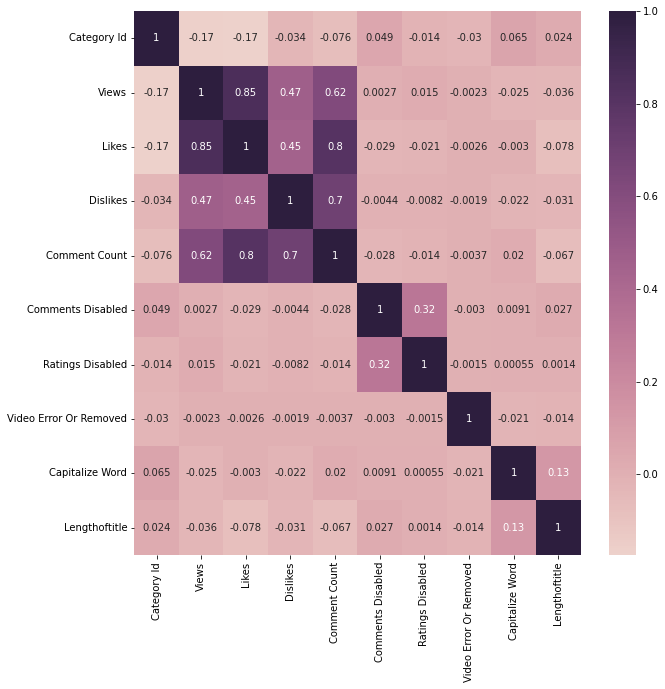

In [17]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(US_Video.select_dtypes(include=['number', 'bool']).columns.values)]

plt.figure(figsize=(10,10))
sns.heatmap(US_Video.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True))


From the correlation map it clearly indicated that number of views and number of likes are strong positive correlatin between them.

